In [92]:
from torch.nn import Linear
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch import optim

torch.manual_seed(1)

# **Regressão**

In [2]:
b = torch.tensor([-0.44])
y = torch.tensor([0.5153])
x =  torch.tensor([0.0])

y = b + y*x
print(y)

tensor([-0.4400])


In [3]:
model = Linear(in_features=1, out_features=1)
# in_features: tamanho da amostra/colunas
# out_features: tamanho das saídas

In [4]:
print(f" Parametros do modelo: \n {list(model.parameters())}")

 Parametros do modelo: 
 [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [5]:
y_hat = model(x)

print(f"\nPredict: {y_hat}")


Predict: tensor([-0.4414], grad_fn=<ViewBackward0>)


In [6]:
x =  torch.tensor([[1.0], [2.0]])

y_hat = model(x)

print(f"\nPredict: {y_hat}")


Predict: tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)


In [7]:
class LR(nn.Module):
    # Constructor
    def __init__(self, input_size, output_size):

        # Inherit from parent
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction function
    def forward(self, x):
        out = self.linear(x)
        return out

In [8]:
lr = LR(1, 1)

X= torch.tensor([[1.0], [2.0], [3.0]])

yhat=lr(X)

print(yhat)

tensor([[ 0.2755],
        [ 0.0816],
        [-0.1122]], grad_fn=<AddmmBackward0>)


In [9]:
print(f"Python dictonary: {lr.state_dict()}\n")
print(f"\nKeys: {lr.state_dict().keys()}\n")
print(f"\nValues: {lr.state_dict().values()}")

Python dictonary: OrderedDict([('linear.weight', tensor([[-0.1939]])), ('linear.bias', tensor([0.4694]))])


Keys: odict_keys(['linear.weight', 'linear.bias'])


Values: odict_values([tensor([[-0.1939]]), tensor([0.4694])])


# **Loss**

In [10]:
def loss(y, w):
  l = (y - (w*4)) ** 2
  return l

In [11]:
weight = [5, 1, -1, -5]

for w in weight:
  ls = loss(y=-2, w=w)
  print(f"Peso: {w}, Loss: {ls}")

Peso: 5, Loss: 484
Peso: 1, Loss: 36
Peso: -1, Loss: 4
Peso: -5, Loss: 324


# **Gradiente**

In [42]:
w0 = -4

n = 1/40

dw = 1/28

x = w0/dw

print(x)

-112.0


In [43]:
w1 = w0 - (n*(x))

print(w1)

-1.1999999999999997


In [44]:
x = w1/dw

print(x)

-33.599999999999994


In [45]:
w2 = w1 - (n*(x))

print(w2)

-0.3599999999999999


In [46]:
x = w2/dw

print(x)

-10.079999999999997


In [57]:
n = 1/40
dw = 1/28
w = -4
for i in range(15):
  x = w/dw
  w = w - (n*(x))
  print(f"Iteração {i+1}: w = {w:.5f}")

Iteração 1: w = -1.20000
Iteração 2: w = -0.36000
Iteração 3: w = -0.10800
Iteração 4: w = -0.03240
Iteração 5: w = -0.00972
Iteração 6: w = -0.00292
Iteração 7: w = -0.00087
Iteração 8: w = -0.00026
Iteração 9: w = -0.00008
Iteração 10: w = -0.00002
Iteração 11: w = -0.00001
Iteração 12: w = -0.00000
Iteração 13: w = -0.00000
Iteração 14: w = -0.00000
Iteração 15: w = -0.00000


# **Regressão**

In [75]:
w = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3*X
Y = f + (0.1*torch.randn(X.size()))

In [59]:
def forward(x):
  return w * x

def criterion(yhat, y):
  return torch.mean((yhat-y)**2)

In [61]:
lr = 0.1
epochs = 4

In [79]:
COST = []
for epoch in range(epochs):
  Yhat = forward(X)
  # print(Yhat)
  loss = criterion(Yhat, Y)
  loss.backward() # calcular o gradiente da perda com relação a todos os parâmetros aprendidos
  w.grad # nos da a derivada no ponto w
  w.data = w.data-(lr*w.grad.data) # w.data nos da acesso a todos os dados dsa variavel
  w.grad.data.zero_() # zerar os gradientes antes de executar a passagem para trás
  COST.append(loss.item())

In [80]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

In [81]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3*X

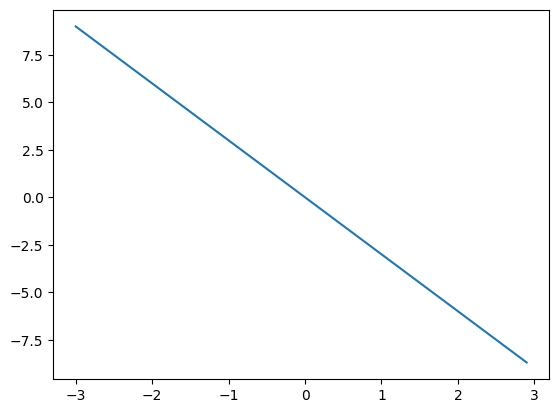

In [83]:
plt.plot(X.numpy(), f.numpy())
plt.show()

In [84]:
Y = f + (0.1*torch.randn(X.size()))

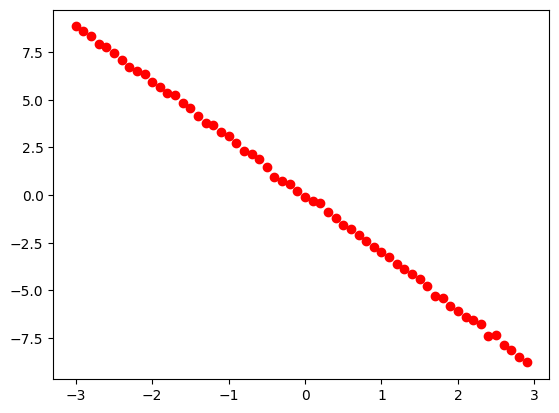

In [86]:
plt.plot(X.numpy(), Y.numpy(), "ro")
plt.show()

In [87]:
# Equação da reta

def forward(x):
  return (w * x) + b

In [89]:
for x, y in zip(X, Y):
  Yhat = forward(x)
  loss = criterion(Yhat, y)
  loss.backward() # calcular o gradiente da perda com relação a todos os parâmetros aprendidos
  w.data = w.data-(lr*w.grad.data) # w.data nos da acesso a todos os dados dsa variavel
  b.data = b.data-(lr*b.grad.data) # w.data nos da acesso a todos os dados dsa variavel
  w.grad.data.zero_() # zerar os gradientes antes de executar a passagem para trás
  b.grad.data.zero_() # zerar os gradientes antes de executar a passagem para trás

In [90]:
for x, y in zip(X, Y):
    # Forward pass: calcula a predição
    Yhat = forward(x)

    # Cálculo da perda
    loss = criterion(Yhat, y)

    # Backward pass: calcula os gradientes
    loss.backward()

    # Atualização dos parâmetros com gradiente descendente
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    # Zerar os gradientes acumulados antes da próxima iteração
    w.grad.zero_()
    b.grad.zero_()

    # Imprimir o progresso
    # print(f'Loss: {loss.item()}, w: {w.item()}, b: {b.item()}')

Loss: 237.7695770263672, w: 3.7095718383789062, b: 4.556374549865723
Loss: 219.8209991455078, w: -4.889718055725098, b: 7.521646976470947
Loss: 165.84950256347656, w: 2.322105884552002, b: 4.945995330810547
Loss: 85.79840850830078, w: -2.6797757148742676, b: 6.798543930053711
Loss: 35.712310791015625, w: 0.4277327060699463, b: 5.603348255157471
Loss: 8.439400672912598, w: -1.0247995853424072, b: 6.184360980987549
Loss: 2.377322196960449, w: -0.28470832109451294, b: 5.8759894371032715
Loss: 0.043377019464969635, w: -0.3805132210254669, b: 5.9176435470581055
Loss: 0.05107010528445244, w: -0.281078964471817, b: 5.872446060180664
Loss: 0.017513737082481384, w: -0.22549638152122498, b: 5.845978260040283
Loss: 0.1404019296169281, w: -0.07561539113521576, b: 5.771037578582764
Loss: 0.05752895772457123, w: 0.015528358519077301, b: 5.723067283630371
Loss: 0.10070642828941345, w: 0.12977176904678345, b: 5.6595988273620605
Loss: 0.028993647545576096, w: 0.18766534328460693, b: 5.625543594360352
L

In [97]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [98]:
for _ in range(100):
  Yhat = model(x)
  loss = criterion(Yhat, y)
  optimizer.zero_grad() # limpa o gradiente
  loss.backward()
  optimizer.step() # atualiza os parâmetros